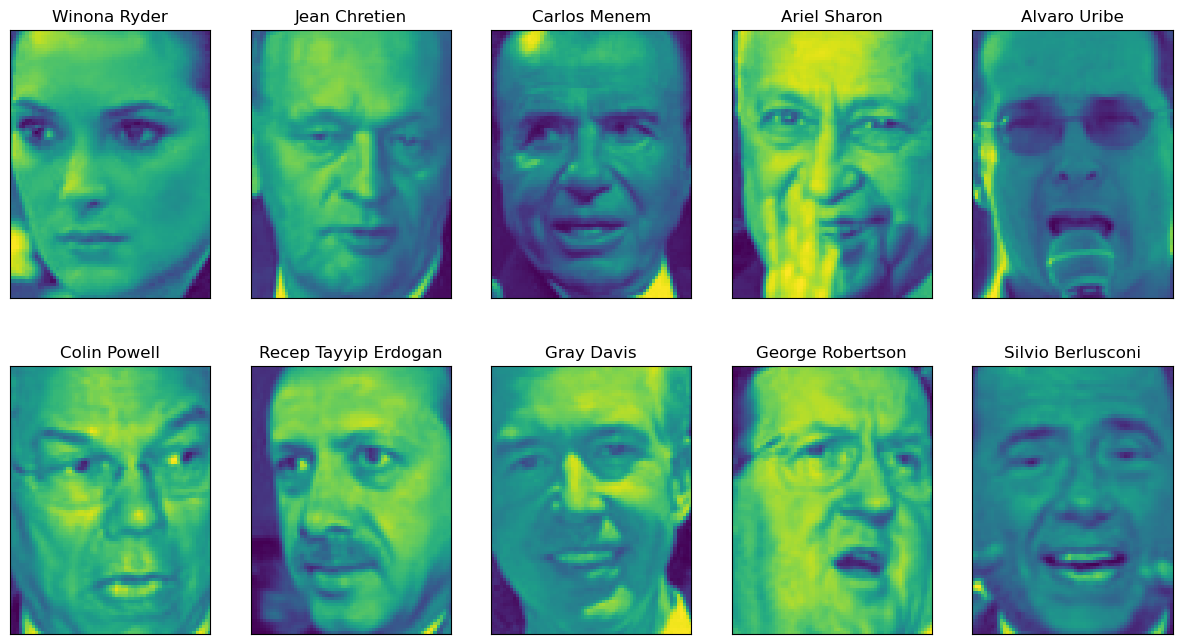

In [2]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
people=fetch_lfw_people(min_faces_per_person=20,resize=0.7)
image_shape=people.images[0].shape
fix,axes=plt.subplots(2,5,figsize=(15,8),subplot_kw={'xticks':(),'yticks':()})
for target,image,ax in zip(people.target,people.images,axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [3]:
print("people.image.shape:{}".format(people.images.shape))
print("Number of classes:{}".format(len(people.target_names)))

people.image.shape:(3023, 87, 65)
Number of classes:62


In [4]:
import numpy as np
counts=np.bincount(people.target)
for i,(count,name) in enumerate(zip(counts,people.target_names)):
    print("{0:25}{1:3}".format(name,count),end=' ')
    if(i+1)%3==0:
        print()

Alejandro Toledo          39 Alvaro Uribe              35 Amelie Mauresmo           21 
Andre Agassi              36 Angelina Jolie            20 Ariel Sharon              77 
Arnold Schwarzenegger     42 Atal Bihari Vajpayee      24 Bill Clinton              29 
Carlos Menem              21 Colin Powell             236 David Beckham             31 
Donald Rumsfeld          121 George Robertson          22 George W Bush            530 
Gerhard Schroeder        109 Gloria Macapagal Arroyo   44 Gray Davis                26 
Guillermo Coria           30 Hamid Karzai              22 Hans Blix                 39 
Hugo Chavez               71 Igor Ivanov               20 Jack Straw                28 
Jacques Chirac            52 Jean Chretien             55 Jennifer Aniston          21 
Jennifer Capriati         42 Jennifer Lopez            21 Jeremy Greenstock         24 
Jiang Zemin               20 John Ashcroft             53 John Negroponte           31 
Jose Maria Aznar          23 Jua

In [5]:
mask=np.zeros(people.target.shape,dtype=bool)
for target in np.unique(people.target):
    mask[np.where(people.target==target)[0][:50]]=1
X_people=people.data[mask]
y_people=people.target[mask]
X_people=X_people/255

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_people,y_people,stratify=y_people,random_state=0)
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
print("Test set score of 1-nn:{:.2f}".format(knn.score(X_test,y_test)))

Test set score of 1-nn:0.22


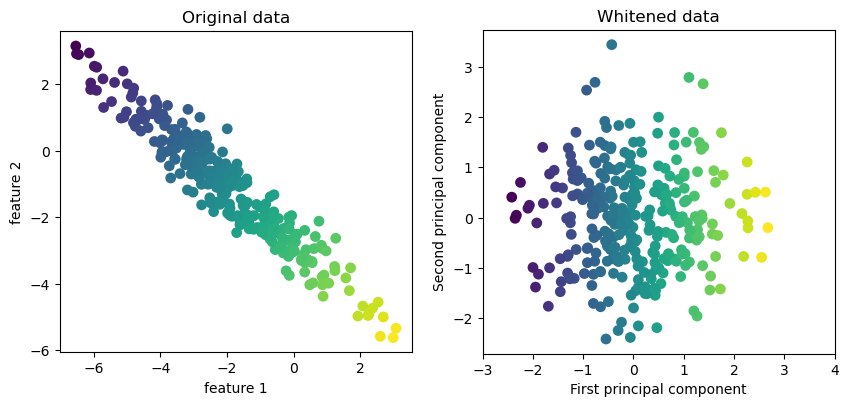

In [7]:
import mglearn
mglearn.plots.plot_pca_whitening()

In [8]:
from sklearn.decomposition import PCA
pca=PCA(n_components=100,whiten=True,random_state=0).fit(X_train)
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)

In [9]:
print("X_train_pca.shape:{}".format(X_train_pca.shape))

X_train_pca.shape:(1547, 100)


In [10]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca,y_train)
print("Test set score of 1-nn:{:.2f}".format(knn.score(X_test_pca,y_test)))

Test set score of 1-nn:0.30


In [11]:
print("PCA component shape:{}".format(pca.components_.shape))

PCA component shape:(100, 5655)


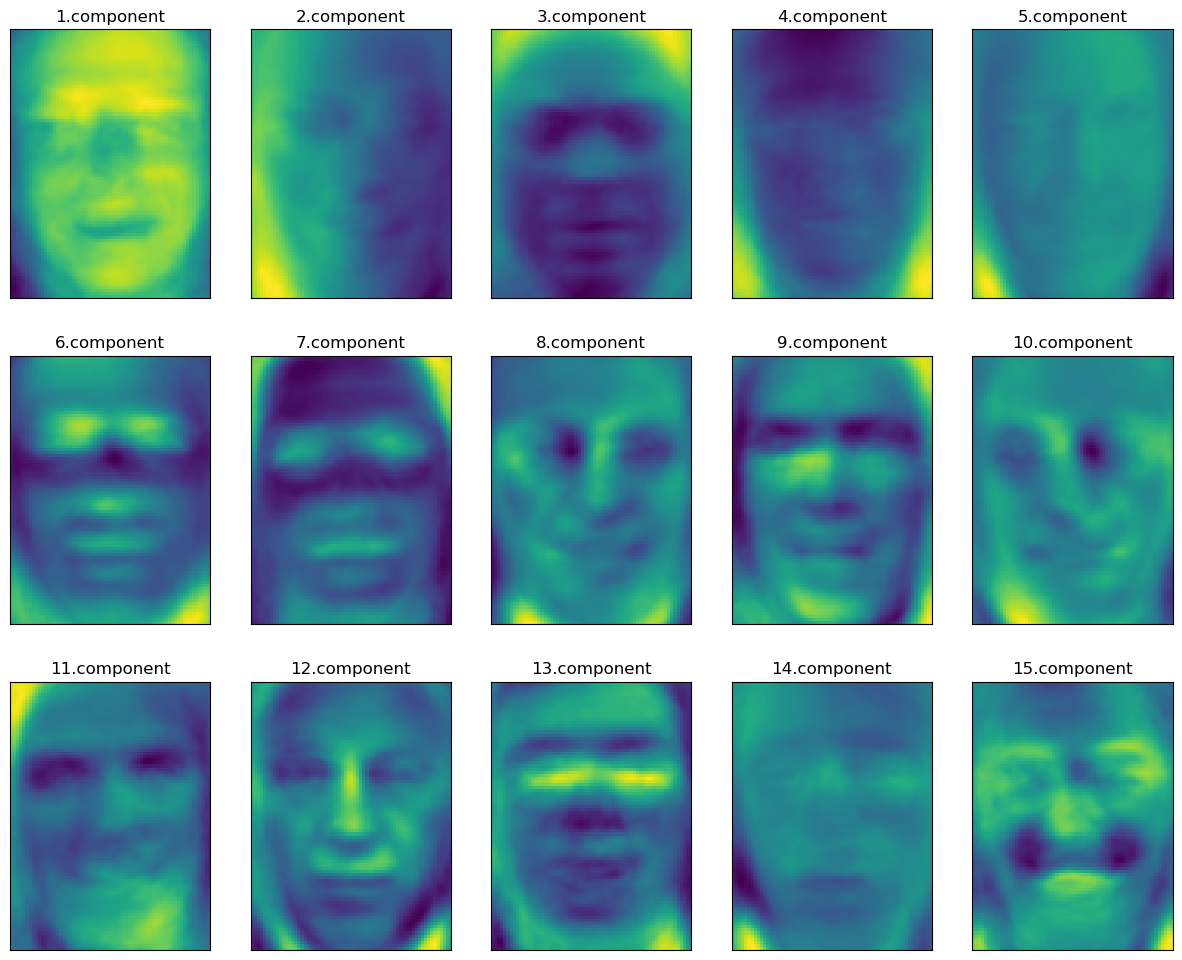

In [12]:
fix,axes=plt.subplots(3,5,figsize=(15,12),subplot_kw={'xticks':(),'yticks':()})
for i,(component,ax)in enumerate(zip(pca.components_,axes.ravel())):
    ax.imshow(component.reshape(image_shape),cmap='viridis')
    ax.set_title("{}.component".format((i+1)))

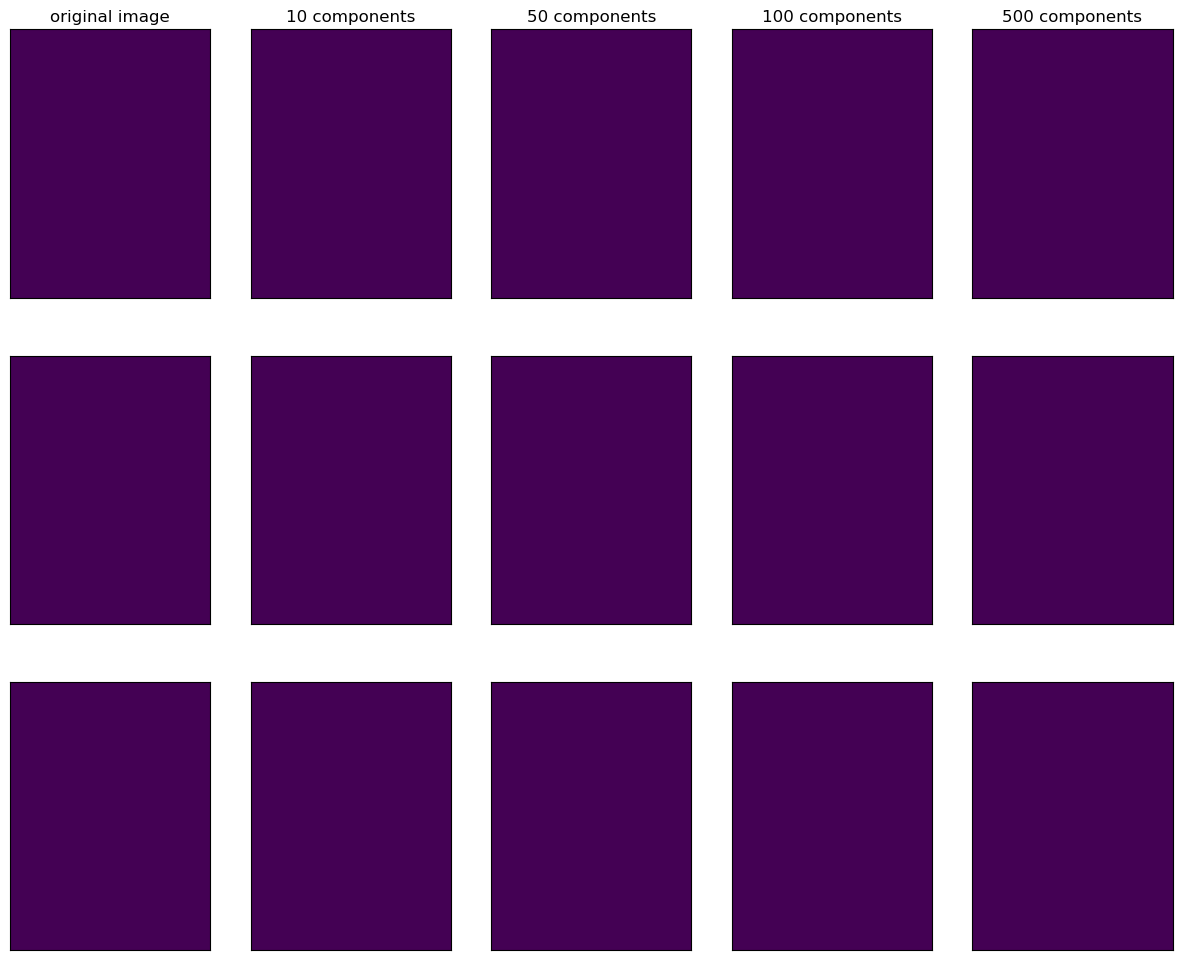

In [13]:
mglearn.plots.plot_pca_faces(X_train,X_test,image_shape)

Text(0, 0.5, 'Second principal component')

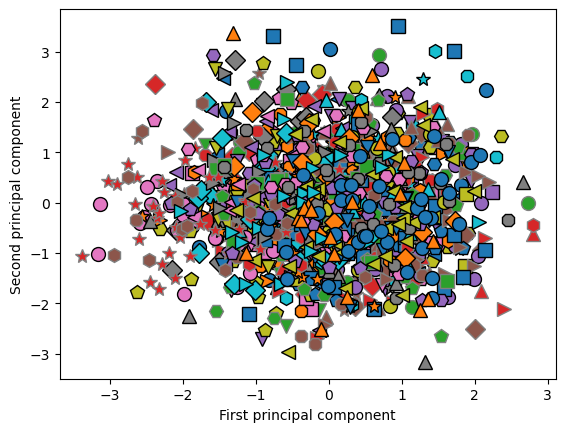

In [14]:
mglearn.discrete_scatter(X_train_pca[:,0],X_train_pca[:,1],y_train)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

D:\anaconda3\Lib\site-packages\sklearn\decomposition\_nmf.py:1200: FutureWarning: The default value of `n_components` will change from `None` to `'auto'` in 1.6. Set the value of `n_components` to `None` explicitly to suppress the warning.
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\decomposition\_nmf.py:1200: FutureWarning: The default value of `n_components` will change from `None` to `'auto'` in 1.6. Set the value of `n_components` to `None` explicitly to suppress the warning.
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


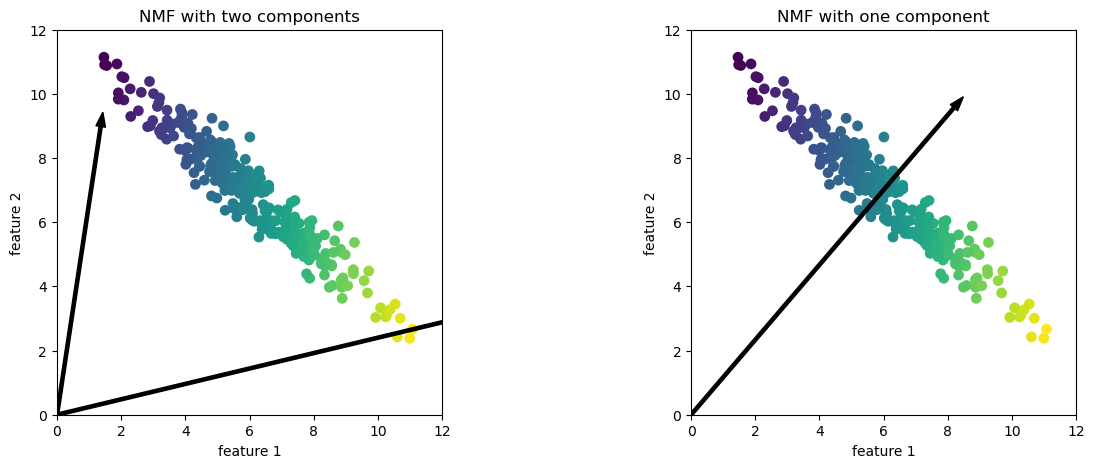

In [15]:
import mglearn
import matplotlib.pyplot as plt
mglearn.plots.plot_nmf_illustration()
plt.show()

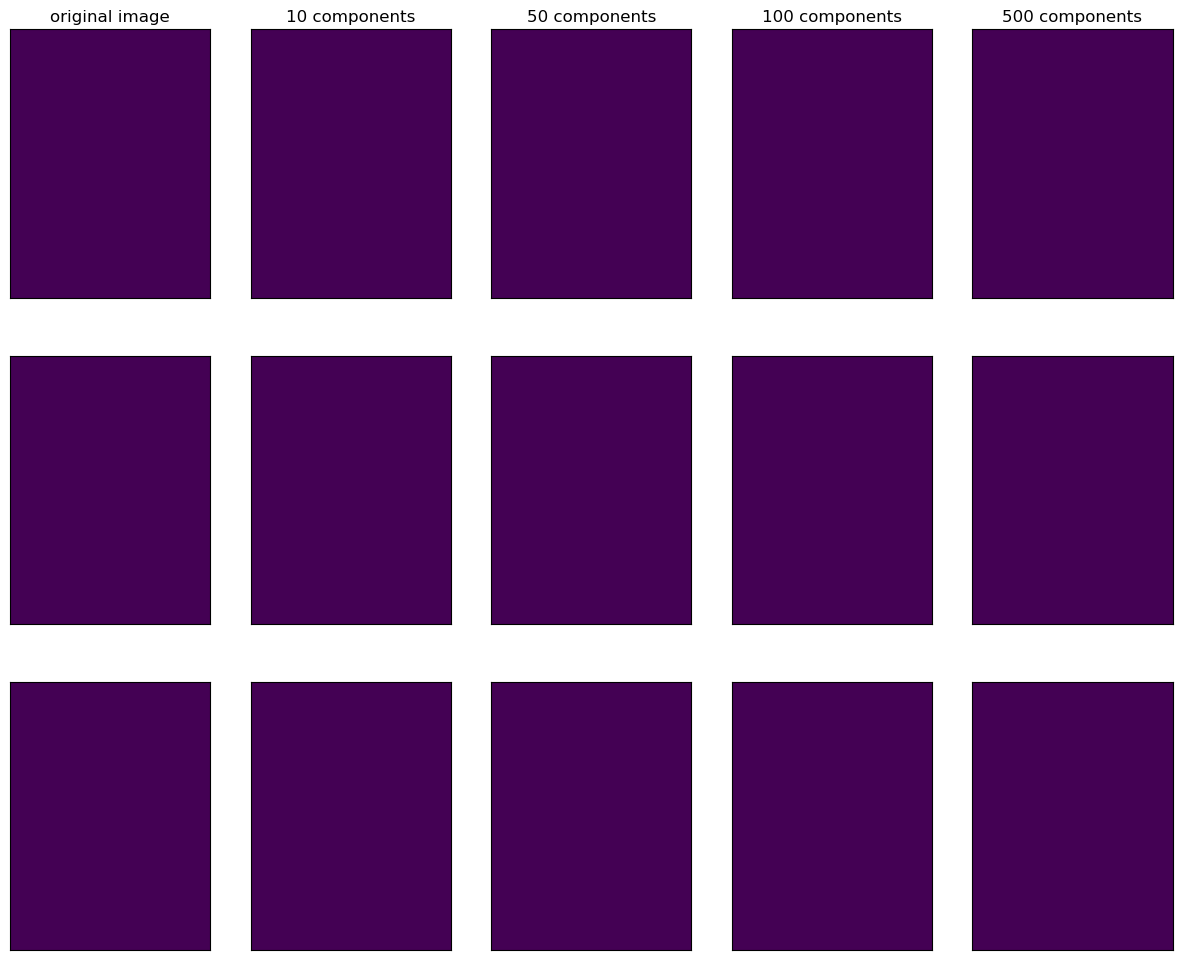

In [16]:
mglearn.plots.plot_nmf_faces(X_train,X_test,image_shape)

D:\anaconda3\Lib\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


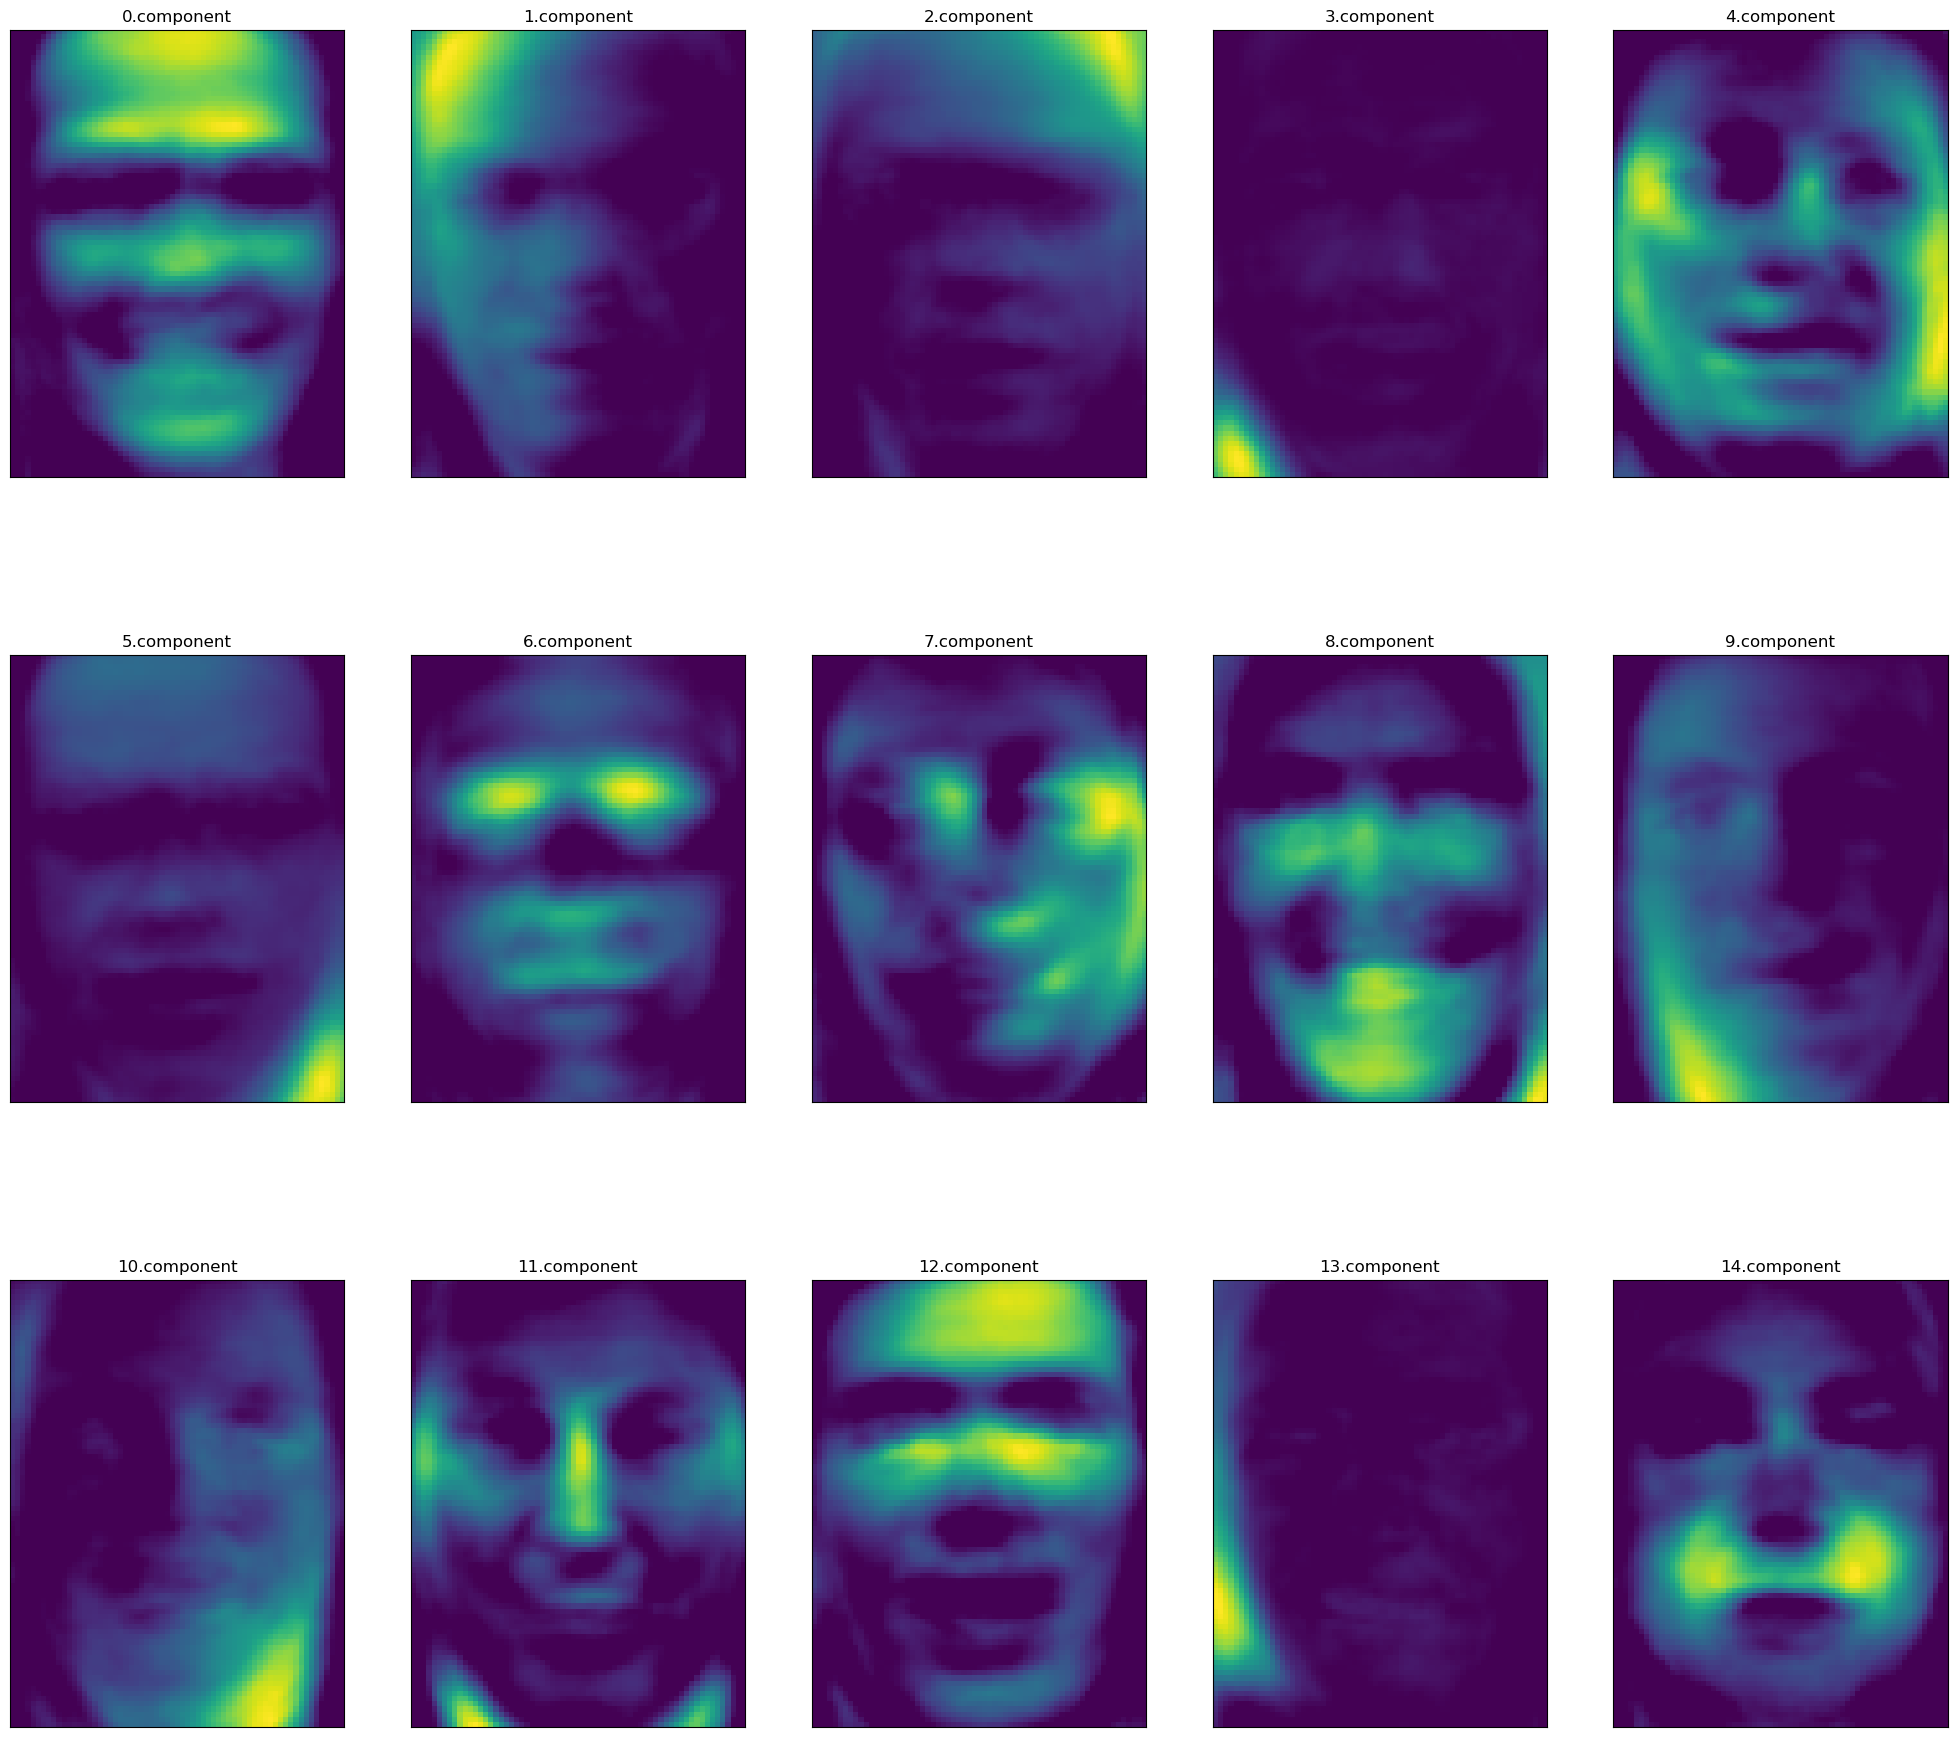

In [17]:
from sklearn.decomposition import NMF
nmf=NMF(n_components=15,random_state=0)
nmf.fit(X_train)
X_train_nmf=nmf.transform(X_train)
X_test_nmf=nmf.transform(X_test)
fix,axes=plt.subplots(3,5,figsize=(25,23),subplot_kw={'xticks':(),'yticks':()})
for i,(component,ax) in enumerate(zip(nmf.components_,axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{}.component".format(i))

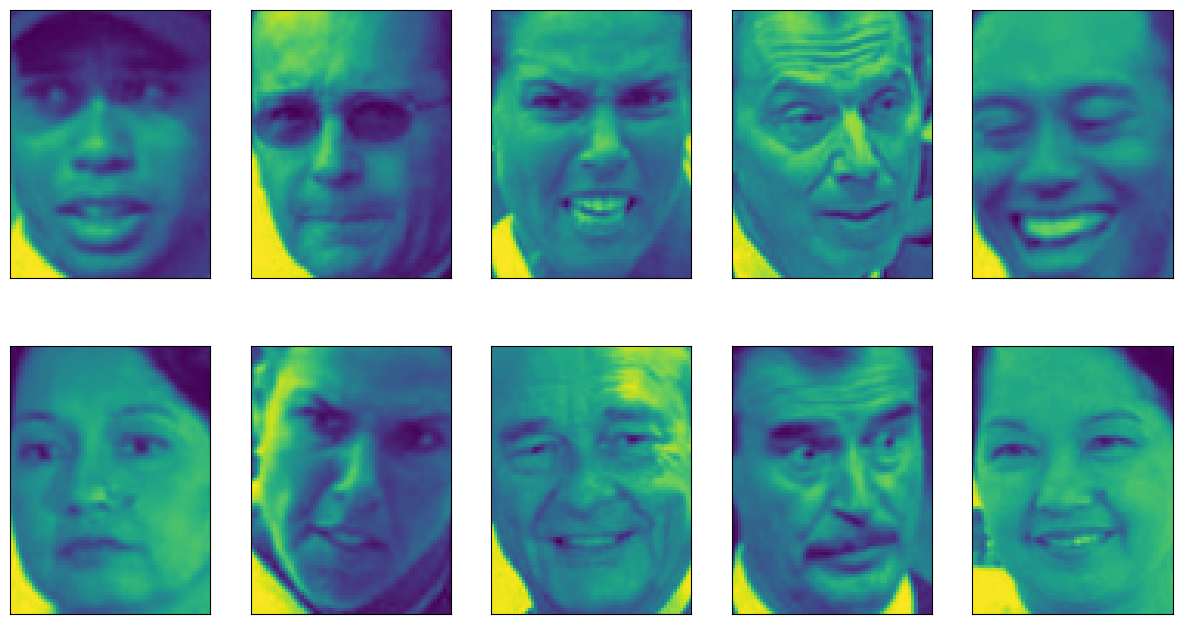

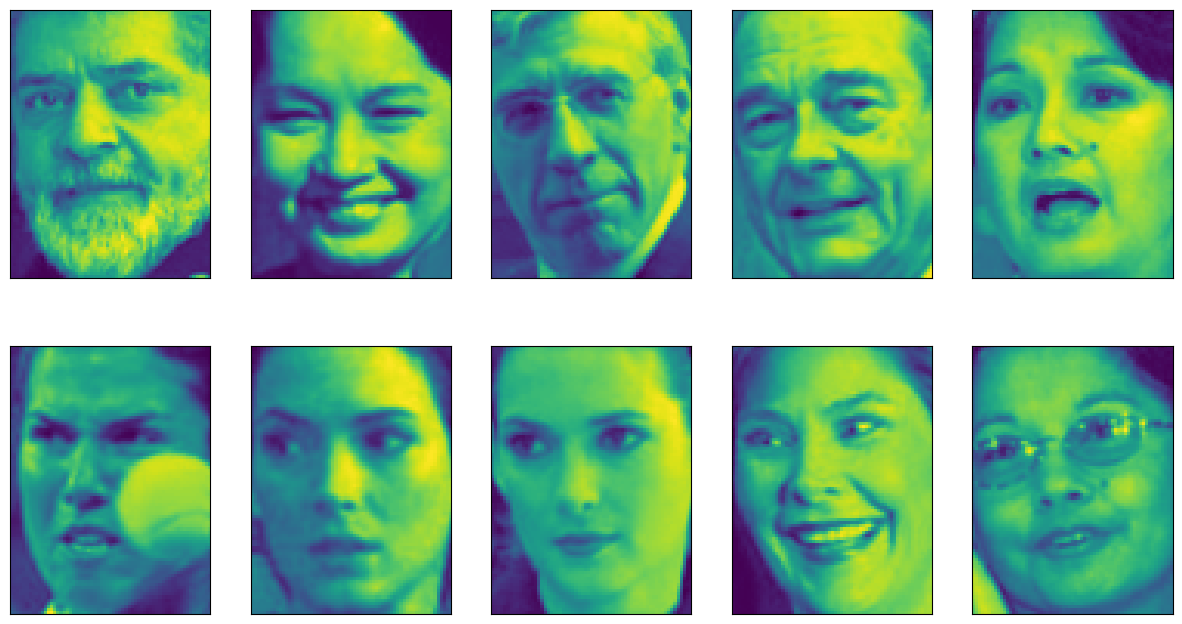

In [18]:
compn=3
inds=np.argsort(X_train_nmf[:,compn])[::-1]
fig,axes=plt.subplots(2,5,figsize=(15,8),subplot_kw={'xticks':(),'yticks':()})
for i,(ind,ax) in enumerate(zip(inds,axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))
compn=7
inds=np.argsort(X_train_nmf[:,compn])[::-1]
fig,axes=plt.subplots(2,5,figsize=(15,8),subplot_kw={'xticks':(),'yticks':()})
for i,(ind,ax) in enumerate(zip(inds,axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

Text(0, 0.5, 'Signal')

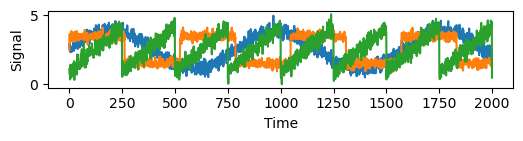

In [19]:
S=mglearn.datasets.make_signals()
plt.figure(figsize=(6,1))
plt.plot(S,'-')
plt.xlabel("Time")
plt.ylabel("Signal")

In [20]:
A=np.random.RandomState(0).uniform(size=(100,3))
X=np.dot(S,A.T)
print("Shape of measurements:{}".format(X.shape))

Shape of measurements:(2000, 100)


In [21]:
nmf=NMF(n_components=3,random_state=42)
S_=nmf.fit_transform(X)
print("Recovered signal shape:{}".format(S_.shape))

Recovered signal shape:(2000, 3)


In [22]:
pca=PCA(n_components=3)
H=pca.fit_transform(X)

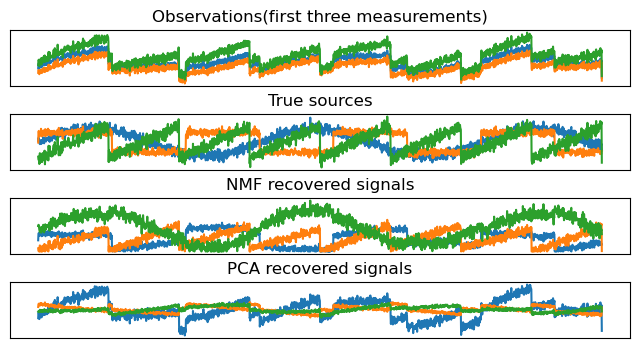

In [25]:
models=[X,S,S_,H]
names=['Observations(first three measurements)','True sources','NMF recovered signals','PCA recovered signals']
fig,axes=plt.subplots(4,figsize=(8,4),gridspec_kw={'hspace':.5},subplot_kw={'xticks':(),'yticks':()})
for model,name,ax in zip(models,names,axes):
    ax.set_title(name)
    ax.plot(model[:,:3],'-')